### Importing libraries and loading data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.neighbors import KNeighborsClassifier

### Loading data set

In [4]:
df=pd.read_csv('train.csv')

### Exploring Data

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Let's see how many people survived and what is the percentage**

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


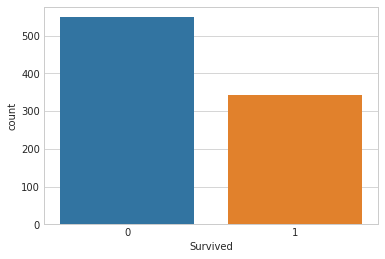

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

In [11]:
survived=sum(df['Survived']==1)
total=len(df['Survived'])
survived_percentage= survived / total
print ('Number of survived people is: ', survived)
print('\n')
print ('Survived Percentage is: ',survived_percentage )

Number of survived people is:  342


Survived Percentage is:  0.3838383838383838


As we see, just 38% of people survived from this disaster

**Let's look at survived - sex relation**

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


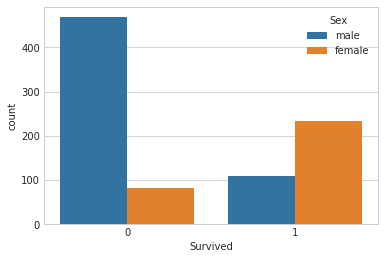

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)

Most of the males are doomed and survived females look like twice of the males.

**Let's see survived - class relation**

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


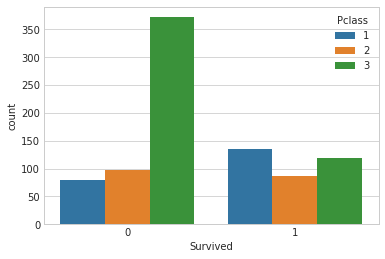

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=df)

([<matplotlib.axis.XTick at 0x7f4cf8cdf5f8>,
 <a list of 3 Text xticklabel objects>)

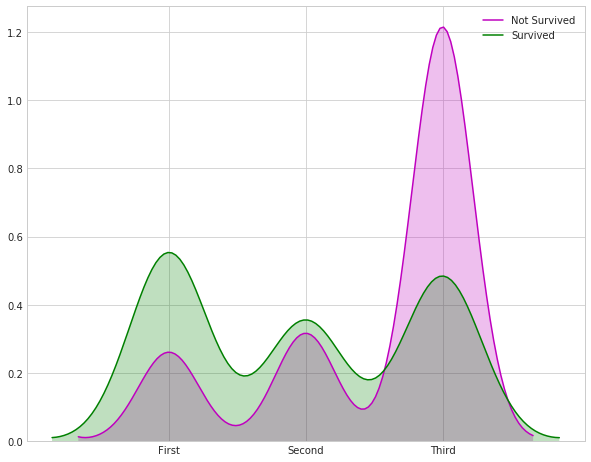

In [14]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'],shade=True,color='m',label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'],shade=True,color='g',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)

The most survivals are in first class.

### Handling with missing values

In [15]:
print (df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


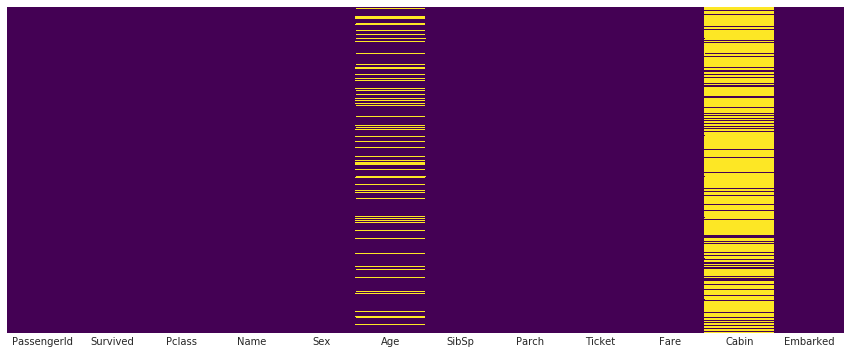

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are null values on Age, Cabin and Embarked columns. We have to take care of these values before applying kNN algorithm

We will fill missing values with mean of age per class. First we will calculate mean of age for each class and then fill the null values with these means.

In [17]:
lst1=[]
lst2=[]
lst3=[]
n=len(df.Survived)
i=0
while i< n:
    if df['Pclass'][i]==1 and pd.isnull(df['Age'][i]) == False:
        lst1.append(df['Age'][i])
    elif df['Pclass'][i]==2  and pd.isnull(df['Age'][i]) == False:
        lst2.append(df['Age'][i])
    elif df['Pclass'][i]==3 and pd.isnull(df['Age'][i]) == False :
        lst3.append(df['Age'][i])
    i+=1

Mean_Pclass_1 = sum(lst1)/len(lst1)
Mean_Pclass_2 = sum(lst2)/len(lst2)
Mean_Pclass_3 = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return Mean_Pclass_1
        elif Pclass ==2:
            return Mean_Pclass_2
        else:
            return Mean_Pclass_3
    else:
        return Age

In [18]:
df.Age= df[['Age', 'Pclass']].apply(impute, axis=1)

In [19]:
df.groupby('Pclass').agg({'Age':['min', 'max', 'count', 'mean']})

Age                       
         min   max count       mean
Pclass                             
1       0.92  80.0   216  38.233441
2       0.67  70.0   184  29.877630
3       0.42  74.0   491  25.140620

It seems creating a family size feature is a good option

In [20]:
df['family_size'] = df.SibSp + df.Parch+1

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


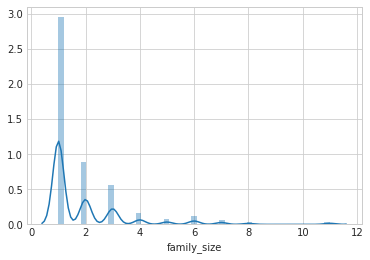

In [22]:
sns.distplot(df.family_size)

Since we do not use Cabin variable on this project we will drop it from data set

In [23]:
df.drop('Cabin', inplace=True, axis=1)

In [24]:
df.dropna(inplace=True)

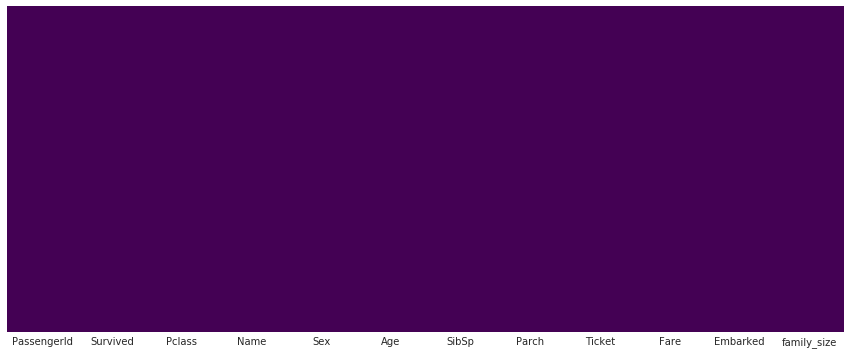

In [25]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

So we do not have any issing values, we are good to go.

**Dummy Variables**

Since Sex and Embark columns are categorical features, we will use dummy variables instead of these ones.

In [26]:
sex=pd.get_dummies(df.Sex, drop_first=True)

In [27]:
embark=pd.get_dummies(df.Embarked, drop_first=True)

In [28]:
df=pd.concat([df,sex,embark], axis=1)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,0,1


In [30]:
df.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Embarked', 'SibSp'], axis=1, inplace=True)

In [31]:
df.head()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
0,0,3,22.0,0,7.2500,2,1,0,1
1,1,1,38.0,0,71.2833,2,0,0,0
2,1,3,26.0,0,7.9250,1,0,0,1
3,1,1,35.0,0,53.1000,2,0,0,1
4,0,3,35.0,0,8.0500,1,1,0,1


In [32]:
df.corr()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
Survived,1.000000,-0.335549,-0.055278,0.083151,0.255290,0.018277,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.400919,0.016824,-0.548193,0.064221,0.127741,0.220558,0.076466
Age,-0.055278,-0.400919,1.000000,-0.174818,0.118050,-0.253264,0.085741,-0.069494,0.005249
Parch,0.083151,0.016824,-0.174818,1.000000,0.217532,0.782988,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.118050,0.217532,1.000000,0.218658,-0.179958,-0.116684,-0.163758
family_size,0.018277,0.064221,-0.253264,0.782988,0.218658,1.000000,-0.203191,-0.059007,0.078197
male,-0.541585,0.127741,0.085741,-0.247508,-0.179958,-0.203191,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.069494,-0.081585,-0.116684,-0.059007,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.005249,0.061512,-0.163758,0.078197,0.121405,-0.499261,1.000000


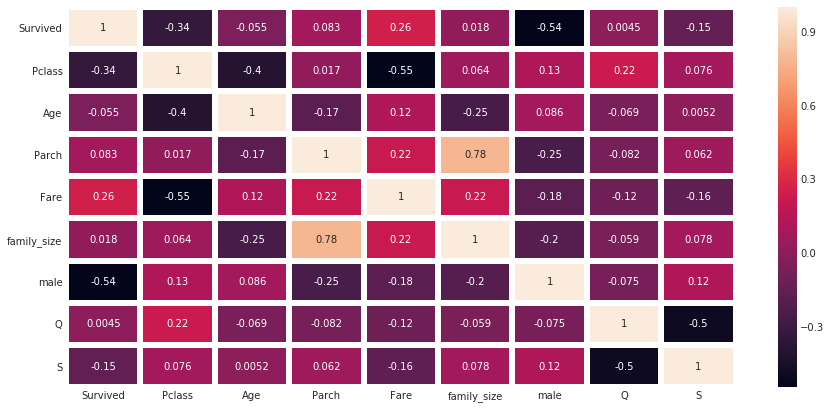

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),linewidths=5, annot=True)

We see that there is high necative correlation between Survived and males. As we saw before by plots male's survive rate was quite low, so it makes sense that males have negative correlation with survive

Besides, Pclass has negative correlation with survived. Because Pclass 3 is the lowest fare class, and this class was the crowded one, and survive rate was pretty low.

Also, Fare has negative correlation with Pclass, this is because Pclass 3 is the cheapest class.

Parch has high positive correlation with family_size. Because when we were creating family_size feature we have used Parch variable.



### kNN Algorithm

In [35]:
X=df.drop('Survived', axis=1)
y=df.Survived

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [39]:
kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
y_pred=kNN.predict(X_test)

In [41]:
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.718
[[147  37]
 [ 46  64]]
0.6336633663366337
0.5818181818181818


### Plot the ROC curve

In [42]:
from sklearn.metrics import roc_curve, auc

In [43]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

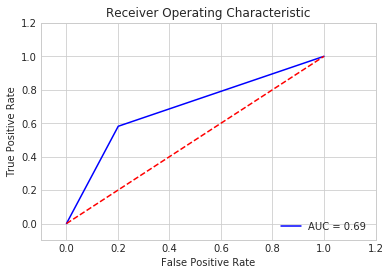

In [45]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')